In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    #regression modeling     
import statsmodels.formula.api as smf # mathematical essentials
from scipy.stats import skew
from sklearn.linear_model  import LinearRegression  # linear regression (statsmodels)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.linear_model import Lasso # linear models
from sklearn.linear_model import ARDRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
birthweight.head(10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
# checking the missing values
print(birthweight.isnull().sum(axis = 0))

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


In [3]:
# soft coding MEDIAN for meduc
meduc_med = birthweight['meduc'].median()


# filling meduc NAs with MEDIAN
birthweight['meduc'].fillna(value = meduc_med,
                       inplace = True)

# checking to make sure NAs are filled in
print(birthweight['meduc'].isnull().any())


False


In [4]:
# soft coding MEDIAN for npvis
meduc_med = birthweight['npvis'].median()


# filling npvis NAs with MEDIAN
birthweight['npvis'].fillna(value = meduc_med,
                       inplace = True)

# checking to make sure NAs are filled in
print(birthweight['npvis'].isnull().any())


False


In [5]:
# soft coding MEDIAN for feduc
feduc_med = birthweight['feduc'].median()


# filling cut NAs with MEDIAN
birthweight['feduc'].fillna(value = feduc_med,
                       inplace = True)


# checking to make sure NAs are filled in
print(birthweight['feduc'].isnull().any())

False


In [6]:
print(birthweight.isnull().sum(axis = 0))

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


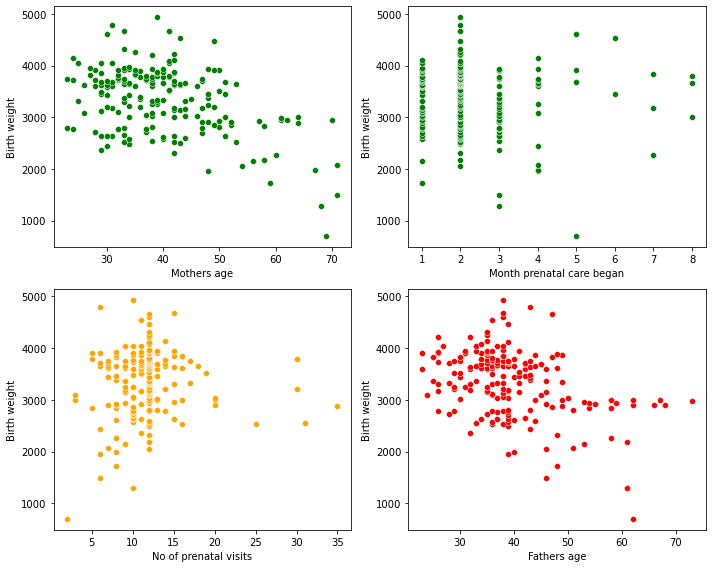

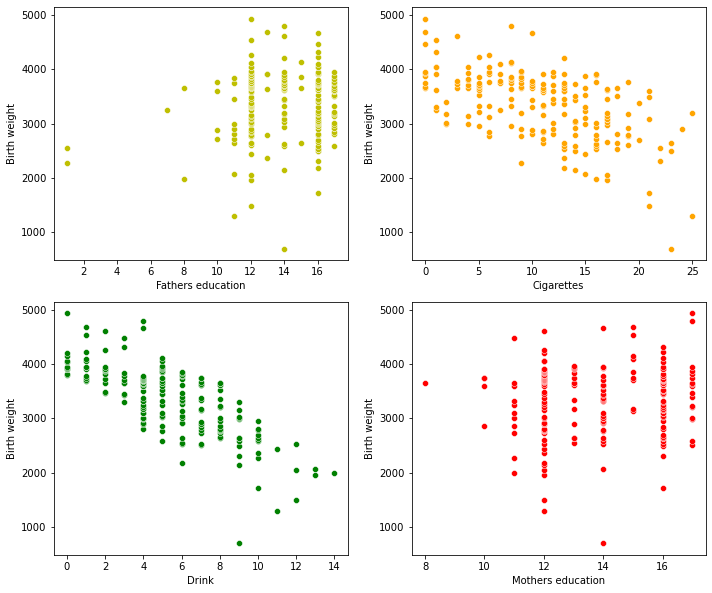

In [7]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers age')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Month prenatal care began')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'No of prenatal visits')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers age')
plt.ylabel(ylabel = 'Birth weight')


# cleaning up the layout, and displaying the results
plt.tight_layout()

plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Fathers education')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cigarettes')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Drink')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mothers education')
plt.ylabel(ylabel = 'Birth weight')


########################


# cleaning up the layout, and displaying the results
plt.tight_layout()

plt.show()

In [8]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~      mage +
                                            meduc +
                                            monpre +
                                            npvis +
                                            fage +
                                            feduc +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth""",
                  data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     35.42
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.88e-43
Time:                        16:25:41   Log-Likelihood:                -1422.5
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2716.7406    178.305     15.236      0.0

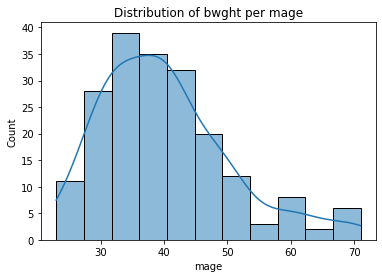

0.9151207781564067


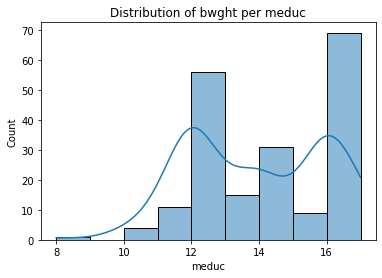

-0.07128327033305132


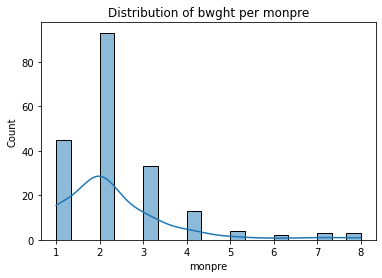

2.016274788463485


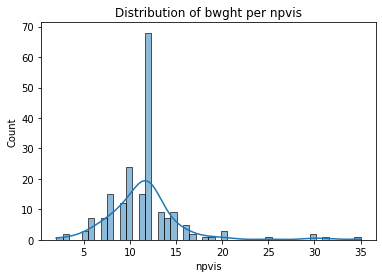

2.2091353595007748


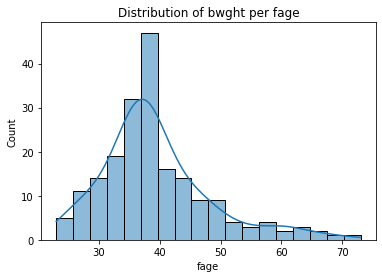

1.111831824415377


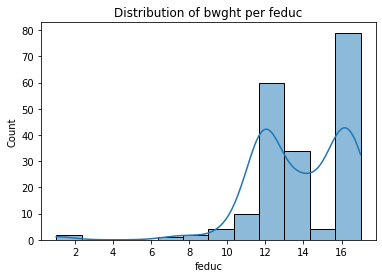

-1.3282653925017014


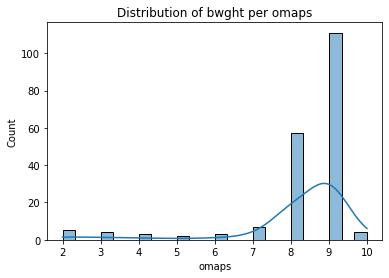

-2.620919917234978


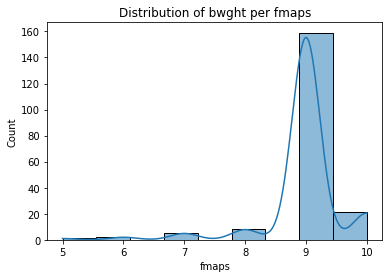

-2.531709811958396


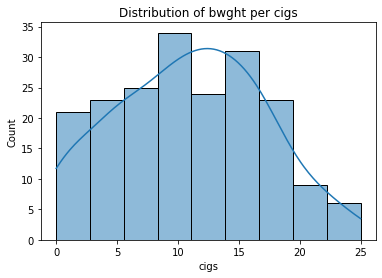

0.03163638518377623


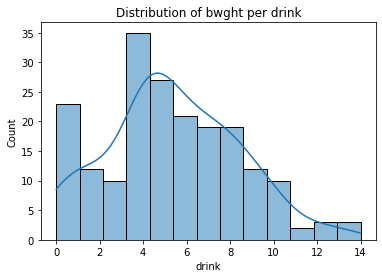

0.23307448542007803


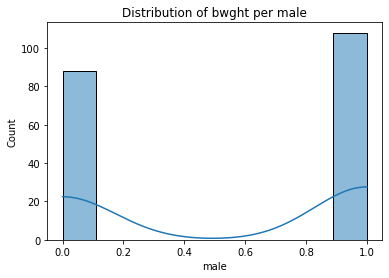

-0.20515248496555402


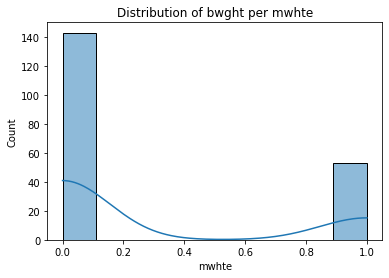

1.0338000668294336


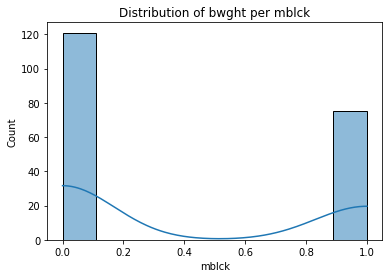

0.48287477059495987


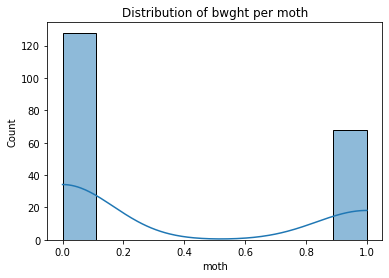

0.6431196942844082


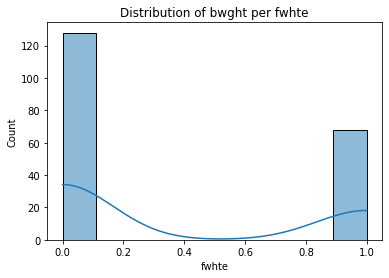

0.6431196942844082


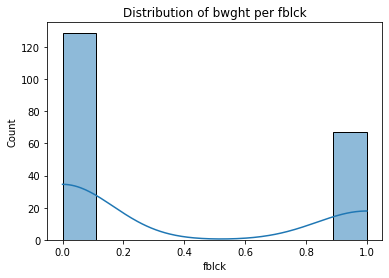

0.6668980276546023


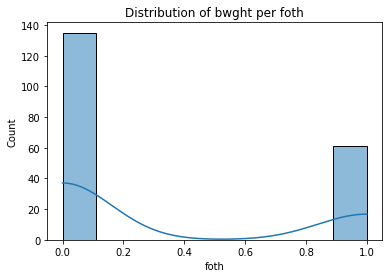

0.81545484605232


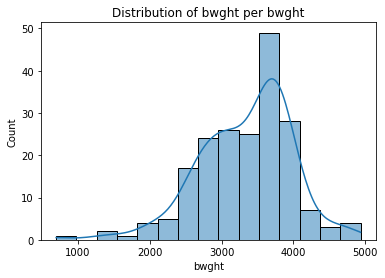

-0.6547713324609364


In [9]:
# using histograms to check features for skewness
for col in birthweight:
    if (birthweight[col].dtype == 'int64' or birthweight[col].dtype == 'float64') and col != 'order':
        sns.histplot(data = birthweight,
                     x    = col,
                     kde  = True)
        
        plt.title(label   = "Distribution of bwght per "+ col)
        plt.xlabel(xlabel = col) # avoiding using dataset labels
        plt.ylabel(ylabel = "Count")


# repeat as many times as necessary
        plt.show()
        print(skew(birthweight[col]))

In [10]:
continuous_data = [ 'bwght','mage',
'meduc',
'monpre',
'npvis' ,
'fage', 
'feduc',
'cigs',
'drink']

# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
birthweight_corr.loc[ : , continuous_data].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07
monpre,-0.05,0.16,-0.23,1.00,-0.34,0.04,-0.29,-0.06,0.02
fage,-0.40,0.58,-0.07,0.04,-0.06,1.00,-0.01,0.17,0.29
mage,-0.46,1.00,-0.09,0.16,-0.05,0.58,-0.09,0.17,0.34
cigs,-0.57,0.17,0.10,-0.06,0.04,0.17,0.05,1.00,0.36
drink,-0.74,0.34,-0.07,0.02,-0.07,0.29,-0.12,0.36,1.00


In [11]:
# log transforming skewed explanatory features


birthweight['log_fage']   = np.log(birthweight['fage'])

birthweight['log_npvis']   = np.log(birthweight['npvis'])
birthweight['log_mage']   = np.log(birthweight['mage'])
birthweight['log_monpre']   = np.log(birthweight['monpre'])



In [12]:
# declaring set of x-variables
x_variables = ['log_mage', 'cigs', 'drink', 'fage']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
cigs +
drink +
fage +


In [13]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(["bwght"],
                                      axis = 1)

birthweight_target = birthweight.loc[ : , "bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 21)
y-side: (147,)


Testing Data
------------
X-side: (49, 21)
y-side: (49,)



In [14]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~  log_mage+
                                         drink +
                                         cigs + 
                                         fage """,
                                data = birthweight)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.32e-49
Time:                        16:25:42   Log-Likelihood:                -1427.7
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     191   BIC:                             2882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6047.8433    407.337     14.847      0.0

In [15]:
# applying modelin scikit-learn


# Preparing a DataFrame based the the analysis above
birthweight_ols_data   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_ols_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            birthweight_ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS

In [16]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4) 

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7046
OLS Testing Score  : 0.6594
OLS Train-Test Gap : 0.0452


# Lasso

In [17]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0,
                    normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.7039
Lasso Testing Score  : 0.6665
Lasso Train-Test Gap : 0.0452


# ARD

In [18]:
# INSTANTIATING a model object
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)



# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.704
Testing Score : 0.6621
ARD Train-Test Gap : 0.0419


In [19]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(birthweight_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(birthweight_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-2.37,-4.84,-2.16,-1.43
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.46,-0.26,-0.68,-0.05
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.51,0.05,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.04,0.26,0.00,-0.05
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.51,0.05,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,0.53,0.26,0.68,0.76
max,3.02,1.52,4.19,5.54,3.76,1.22,1.15,1.59,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,2.98,3.31,2.46,2.71


In [20]:
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# KNN

In [21]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 8)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6314
KNN Testing Score : 0.4622
KNN Train-Test Gap: 0.1692


In [22]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = birthweight_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(birthweight_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
mage          104.527593
meduc           4.140436
monpre          1.827025
npvis          17.840561
fage           80.277671
feduc           6.656680
omaps           2.472616
fmaps           0.422194
cigs           37.035714
drink           8.964077
male            0.247397
mwhte           0.197288
mblck           0.236230
moth            0.226572
fwhte           0.226572
fblck           0.224984
foth            0.214364
log_fage        0.046697
log_npvis       0.123468
log_mage        0.059339
log_monpre      0.252097
dtype: float64


Dataset AFTER Scaling
----------------------
mage          1.0
meduc         1.0
monpre        1.0
npvis         1.0
fage          1.0
feduc         1.0
omaps         1.0
fmaps         1.0
cigs          1.0
drink         1.0
male          1.0
mwhte         1.0
mblck         1.0
moth          1.0
fwhte         1.0
fblck         1.0
foth          1.0
log_fage      1.0
log_npvis     1.0
log_mage      1.0
log_mo

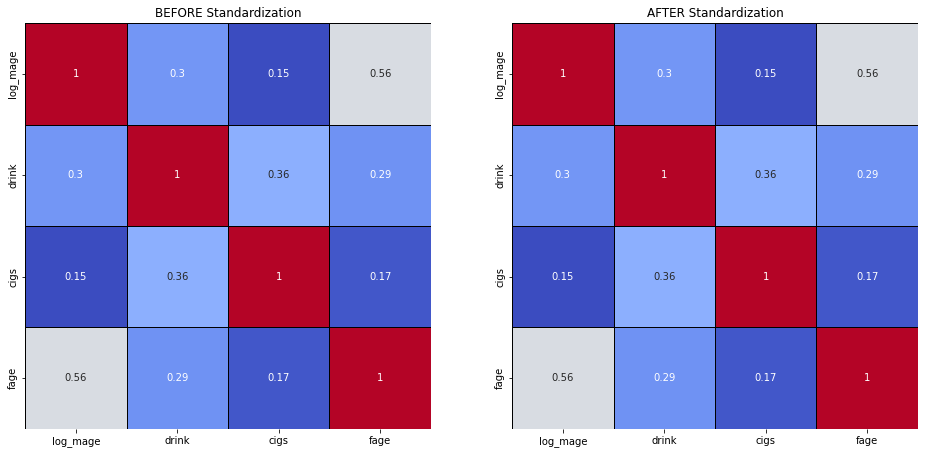

In [23]:
##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
birthweight_subset = birthweight_data.loc[ : , ['log_mage',
                                        'drink',
                                       'cigs',
                                       'fage']]


# UNSCALED correlation matrix
df_corr = birthweight_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black', 
            linewidths = 0.5)



##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = x_scaled_df.loc[ : , ['log_mage',
                                        'drink',
                                       'cigs',
                                       'fage']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black',
            linewidths = 0.5)


# titling the plot
plt.title("AFTER Standardization")
plt.savefig('./Corrplots Before and After Scaling.png')
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

In [25]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.3562
KNN Train-Test Gap: 0.6438


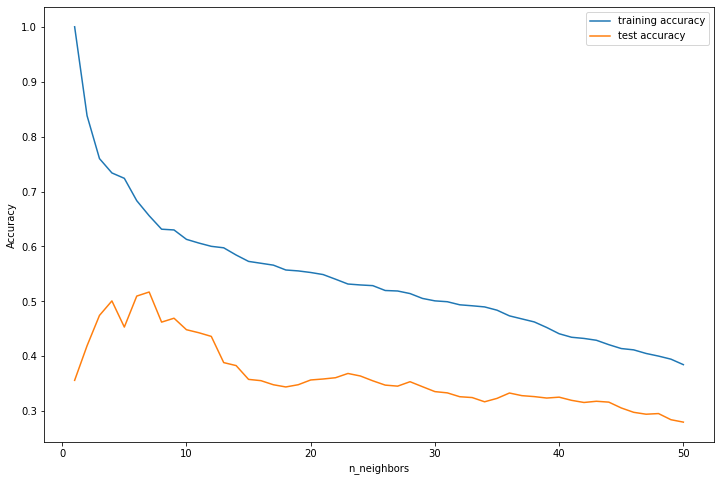

In [26]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [27]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 7


In [28]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.6559
KNN Testing Score : 0.5171
KNN Train-Test Gap: 0.1388


In [29]:
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

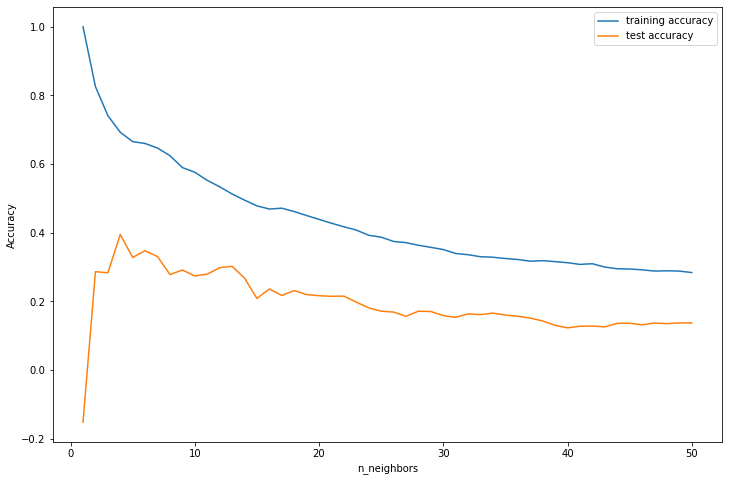

The optimal number of neighbors is 4


In [30]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [31]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(x_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(x_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.6928
KNN Testing Score : 0.3951
KNN Train-Test Gap: 0.2977


In [32]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      14            {knn_opt_score_train}           {knn_opt_score_test}
Standardized          6             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", "NA", "NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.3562
Non-Standardized      14            0.6559           0.5171
Standardized          6             0.6928           0.3951



In [33]:
print(f"""
Model      Train Score      Test Score         Train-Test Gap
-----      -----------      ----------         ------------
*OLS*      {lr_train_score}           {lr_test_score}             {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}             {lasso_test_gap}
ARD        {ard_train_score}            {ard_test_score}             {ard_test_gap}
KNN        {knn_stand_score_train}           {knn_stand_score_test}             {knn_stand_test_gap}

*OLS is the recommended final model.*
""")


Model      Train Score      Test Score         Train-Test Gap
-----      -----------      ----------         ------------
*OLS*      0.7046           0.6594             0.0452
Lasso      0.7039           0.6665             0.0452
ARD        0.704            0.6621             0.0419
KNN        0.6928           0.3951             0.2977

*OLS is the recommended final model.*

